`Ecuación de Van der Waals`

$\left(p + \dfrac{a}{v^2}\right)\left(v-b\right)=kT$

$a = 3.599, b = 0.0467$

## *a) Resolver para $v$, con $T=80ºC$ y $p={10, 15, 20, 40} atm$*

* #### _Por logica nos guiamos a que si necesitamos saber la "$ v $" y tenemos todos los valores,  solo la despejamos, pero no es asi, se debe recurrir a una método o paso algebraico distinto, para poder llegar al polinomio. y esa forma es :_

$\left(\dfrac{pv^2}{v^2} + \dfrac{a}{v^2}\right)\left(v-b\right)=kT$

$\Rightarrow \left(\dfrac{pv^2 + a}{v^2}\right)\left(v-b\right)=kT$

$\Rightarrow \dfrac{\left(pv^2 + a\right)\left(v-b\right)}{v^2}=kT$

$\Rightarrow \left(pv^2 + a\right)\left(v-b\right)=kTv^2$
                                                                                
$\Rightarrow pv^3 + av - pbv^2 - ab = kTv^2$

$\Rightarrow pv^3 + av - pbv^2 - kTv^2  = ab$

$\Rightarrow pv^3 - (pb + kT)v^2 + av  = ab$

 $f(v) = pv^3 - (pb + kT)v^2 + av - ab $ 

In [3]:
# Definimos las funciones con respecto a la presión asignada.
#Y las llamamos con las variables [f_1(v),f_2(v),f_3(v),f_4(v),] respectivamente para las distintas presiones . 
def f_1(v):
    a = 3.599
    b = 0.0467                   
    k = 8.6173e-5                #Para cuando P = 10
    T = 80 + 273.15               #La temperatura se debe expresar en Kelvin, es por eso la suma de 80 más 273.15
    p = 10                      

    return (p * v**3) - ((p * b + k * T) * v**2) + (a * v) - (a * b) # Este es nuestro polinomio obtenido de la f(v)

def f_2(v):
    a = 3.599
    b = 0.0467
    k = 8.6173e-5               #Para cuando P = 15
    T = 80 + 273.15             
    p = 15

    return (p * v**3) - ((p * b + k * T) * v**2) + (a * v) - (a * b)

def f_3(v):
    a = 3.599
    b = 0.0467                  #Para cuando P = 20
    k = 8.6173e-5
    T = 80 + 273.15             
    p = 20

    return (p * v**3) - ((p * b + k * T) * v**2) + (a * v) - (a * b)

def f_4(v):
    a = 3.599
    b = 0.0467
    k = 8.6173e-5
    T = 80 + 273.15              #Para cuando P = 40 
    p = 40

    return (p * v**3) - ((p * b + k * T) * v**2) + (a * v) - (a * b)

* #### _Se define un método numérico a utilizar, en mi caso elegí la bisección dado que principalmente es el método mas sencillo para encontrar raices, lo cual ocupamos para este tipo de problemas de ecuaciones no lineales._   

In [4]:
 # Una vez se definen las funciones en cada variable "f_n(v)" se define "biseccion" como el método a utilizar 
 # y se comienza el proceso de iteraciones.     


def bisection(f, a_0, b_0, eps=1e-8, N=100):
    
    if not f(a_0) * f(b_0) < 0:
        print("Cannot compute root, verify interval.")
        return None
    
    a = a_0
    b = b_0
    
    for i in range(N):
        m = (a + b) / 2
        
        if f(a) * f(m) < 0:
            a = a
            b = m
        if f(b) * f(m) < 0:
            a = m
            b = b
        
        if abs(f(m)) < eps:
            print("Root found!")
            print(f"Iteración {i + 1} de {N}")
            return m
    
    print("Root not found! Max-iterations exceeded.")
    return None

* #### _Las siguientes lineas de codigo, son solamente para comprabar que los limites y datos esten bien, evaluando en uno de los parametros de la biseccion, que es, que el producto de la funcion evaluado en los limites asignados sea menor a cero._ 
#### $f(a_0)*f(b_0) < 0$

In [5]:
print(f_1(0) * f_1(100)) # [0, 100]  #comprobación 

-1679957.4109628676


In [6]:
R1 = bisection(f_1, 0, 100, 100)
R1

Root found!
Iteración 6 de 100


1.5625

In [7]:
print(f_2(0) * f_2(100)) # [0, 100] # comprobación 

-2519931.4598073675


In [8]:
R2 = bisection(f_2, 0, 100, 100)
R2

Root found!
Iteración 6 de 100


1.5625

In [9]:
print(f_3(0) * f_3(100)) # [0, 100] # comprobación 

-3359905.5086518675


In [10]:
R3 = bisection(f_3, 0, 100, 100)
R3

Root found!
Iteración 6 de 100


1.5625

In [11]:
print(f_4(0) * f_4(100)) # [0, 100] # comprobación 

-6719801.704029868


In [12]:
R4 = bisection(f_4, 0, 100, 100)
R4

Root found!
Iteración 7 de 100


0.78125

In [13]:
#En resumen el resultado de raices es: 
print ("El resultado de R1 es :",R1)
print ("El resultado de R2 es :",R2)
print ("El resultado de R3 es :",R3)
print ("El resultado de R4 es :",R4)

El resultado de R1 es : 1.5625
El resultado de R2 es : 1.5625
El resultado de R3 es : 1.5625
El resultado de R4 es : 0.78125


## *b) Aproximar un polinomio con los 4 puntos que calculamos en (a):*

### $v(p_1) = x_1$

### $v(p_2) = x_2$

### $v(p_3) = x_3$

### $v(p_4) = x_4$

#### Encontrar $v(p)$

* #### _Aqui utilicé la paqueteria de scipy en concreto el módulo de interpolate e importé lagrage del mismo._ 

In [14]:
# tambien adjunto referencia de la documentacion oficial de scipy para un mejor conocimiento del módulo 
# Referencia: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html
from scipy.interpolate import lagrange
import numpy as np

p = np.array([10, 15, 20, 40]) # Las presiones las llamo a una variable y las convierto en un arreglo de numpy.
v = np.array([R1, R2, R3, R4]) # Al igual que mis raices obtenidas de las funciones dadas anteriormente 
poly = lagrange(p, v)          # Y en la variable poly agrego mi modulo de lagrage para hacer la magia :D 

In [15]:
from numpy.polynomial.polynomial import Polynomial
coefs = Polynomial(poly).coef
coefs

array([-5.20833333e-05,  2.34375000e-03, -3.38541667e-02,  1.71875000e+00])

In [16]:
def f(x): # Y definimos la funcion f(x) donde nos regresará los coeficientes, y ya que se convirtineron 
          # previamente a un arreglo de numpy los llamamos como su numero asignado de lista[0,1,2,3]
   
    return coefs[0]*x**3 + coefs[1]*x**2 + coefs[2]*x + coefs[3] 

## *c) Graficar y comentar*

El resultado de R1 es : 1.5625
El resultado de R2 es : 1.5625
El resultado de R3 es : 1.5625
El resultado de R4 es : 0.78125


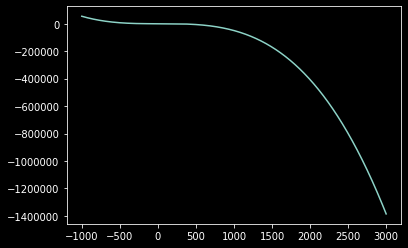

In [17]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')  

x = np.linspace(-1000, 3000, 10000)
y = f(x)
plt.plot(x, y)



#Datos obtenidos en el primer apartado 
print ("El resultado de R1 es :",R1)
print ("El resultado de R2 es :",R2)
print ("El resultado de R3 es :",R3)
print ("El resultado de R4 es :",R4)

#### `Referencia:` _Para ver el comportamiento_
* #### _Hay una similitud muy grande en las dos graficas, que es lo que se debe ver, una misma funcion evaluada solo en puntos distintos, pero que al final la fisica nos dice que su comportamiento debe ser el mismo._

<img src="https://d2vlcm61l7u1fs.cloudfront.net/media%2Fb1b%2Fb1b02456-55db-4352-bf68-e0afd7dfa0b2%2FphpihBZBf.png" width="50%">

## *d) Predicciones para 50, 80 y 100*

In [18]:
print("Para f(50) el resultado es: ",f(50))
print("Para f(80) el resultado es: ",f(80))       # Y evaluamos nuestra misma función para predecir el comportamiento, 
print("Para f(100) el resultado es:",f(100))      # ahora con la presion en [50,80,100].

Para f(50) el resultado es:  -0.6249999999999707
Para f(80) el resultado es:  -12.656249999999932
Para f(100) el resultado es: -30.3124999999999


## *e) Usar (a) para aproximar $v$ con $p$'s del inciso anterior*
* #### _Evaluando la funcion dada en el primer inciso, corroboramos que los datos sean correctos con respecto a la prediccion del modelo anterior_

In [19]:
# Definimos ahora las funciones [5,6,7] para corroborar los datos. 

def f_5(v):
    a = 3.599
    b = 0.0467
    k = 8.6173e-5         #cuando la presion es igual a 50 
    T = 80 + 273.15
    p = 50

    return (p * v**3) - ((p * b + k * T) * v**2) + (a * v) - (a * b)

def f_6(v):
    a = 3.599
    b = 0.0467            #cuando la presion es igual a 80 
    k = 8.6173e-5
    T = 80 + 273.15
    p = 80

    return (p * v**3) - ((p * b + k * T) * v**2) + (a * v) - (a * b)

def f_7(v):
    a = 3.599
    b = 0.0467           #cuando la presion es igual a 100 
    k = 8.6173e-5
    T = 80 + 273.15
    p = 100

    return (p * v**3) - ((p * b + k * T) * v**2) + (a * v) - (a * b)

In [20]:
print(f_5(0) * f_5(100)) # [0, 100]   # comprobamos para ver que si esta cumpliendo los parametros dados para la bisección. 
print(f_6(0) * f_6(100)) # [0, 100]
print(f_7(0) * f_7(100)) # [0, 100]

-8399749.801718868
-13439594.094785871
-16799490.29016387


In [21]:
# Buscamos las raices con respecto a las funciones [5,6,7]. 
R5 = bisection(f_5, 0, 100, 100)  
R6 = bisection(f_6, 0, 100, 100)
R7 = bisection(f_7, 0, 100, 100)
print("el resultado para R5 es :" ,R5)
print("el resultado para R56 es :" ,R6)
print("el resultado para R7 es :" ,R7)

Root found!
Iteración 7 de 100
Root found!
Iteración 7 de 100
Root found!
Iteración 7 de 100
el resultado para R5 es : 0.78125
el resultado para R56 es : 0.78125
el resultado para R7 es : 0.78125


* #### _Y se obtienen los errores para las raices [5,6,7]_

In [22]:
print(np.abs(R5 - f(50)))
print(np.abs(R6 - f(80)))
print(np.abs(R7 - f(100)))

1.4062499999999707
13.437499999999932
31.0937499999999


## *f) Encontrar nuevo polinomio, predecir y calcular errores*
* #### _Y buscamos ahora un nuevo polinomio con los datos obtenidos en los puntos 1 y 4. Y repetimos los puntos 4 y 5 pero evaluando ahora para la presion a [90,110] atm._

In [23]:
p_2 = np.array([10, 15, 20, 40, 50, 80, 100])
v_2 = np.array([R1, R2, R3, R4, f(50), f(80), f(100)]) #Vuelvo a importar el modulo de lagrage . 
poly_2 = lagrange(p_2, v_2)                            # y llamo a la variable donde sera almacenado el siguiente polinomio como poly_2

In [24]:
coefs_2 = Polynomial(poly_2).coef                   # También utilizo el módulo de .coef para los coeficientes,
coefs_2                                             # que almacené en la variable coef_2.

array([ 3.82571033e-23, -1.06408514e-20,  1.07403778e-18, -5.20833333e-05,
        2.34375000e-03, -3.38541667e-02,  1.71875000e+00])

In [25]:
# defino mi f_2(x) y que me regrese los valores de los coeficientes tomandolos con su numero de lista antes puesto por el arreglo de numpy. 
def f_2(x):
    return coefs_2[0]*x**6 + coefs_2[1]*x**5 + coefs_2[2]*x**4 + coefs_2[3]*x**3 + coefs_2[4]*x**2 + coefs_2[5]*x + coefs_2[6]

In [26]:
# E imprimo mis valores para mi funcion 2 evaluado en las presiones anteriores. 
print(f_2(50)) 
print(f_2(80))
print(f_2(100))
print(f_2(90))
print(f_2(110))

-0.6249999999997082
-12.656249999998952
-30.312499999998224
-20.31249999999866
-42.9687499999973


In [27]:
# Defino mis ultimas dos funciones 8 y 9.
def f_8(v):
    a = 3.599
    b = 0.0467
    k = 8.6173e-5               # Para cuando la presion es 90
    T = 80 + 273.15
    p = 90

    return (p * v**3) - ((p * b + k * T) * v**2) + (a * v) - (a * b)

def f_9(v):
    a = 3.599
    b = 0.0467
    k = 8.6173e-5              # Para cuando la presion es 110
    T = 80 + 273.15
    p = 110

    return (p * v**3) - ((p * b + k * T) * v**2) + (a * v) - (a * b)

In [28]:
print(f_8(0) * f_8(100)) # [0, 100] # corroboro mis datos con respecto a los parametros de la biseccion. 
print(f_9(0) * f_9(100)) # [0, 100]

-15119542.192474872
-18479438.38785287


In [29]:
R8 = bisection(f_8, 0, 100, 100)
R9 = bisection(f_9, 0, 100, 100)  # Y ya que se cumple mis parametros, busco mis raices con el metodo de biseccion e imprimo mis resultados 
print("Para R8 el resultado es: ",R8)
print("Para R9 el resultado es: ",R9)

Root found!
Iteración 7 de 100
Root found!
Iteración 7 de 100
Para R8 el resultado es:  0.78125
Para R9 el resultado es:  0.78125


In [30]:
print(np.abs(R5 - f_2(50)))
print(np.abs(R6 - f_2(80)))
print(np.abs(R7 - f_2(100))) # y reviso cual es el error para mis ultimas funciones. 
print(np.abs(R8 - f_2(90)))
print(np.abs(R9 - f_2(110)))

1.4062499999997082
13.437499999998952
31.093749999998224
21.09374999999866
43.7499999999973




* #### _explicacion de que deferencia hubo entre los metodos de aproximación utilizados._

`los metodos de aproximación utilizados son muy precisos, se puede corroborar en el tamaño del error que nos arrojó, es muy muy pequeño. pero los mismos cumplieron su objetivo, al final por eso es una aproximación.`


